In [61]:
import numpy as np
import yfinance
from sklearn.preprocessing import MinMaxScaler
stocks=yfinance.download("AAPL", start="2015-01-01", end="2025-01-01")
stocks

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288580,24.757334,23.848706,24.746226,212818400
2015-01-05,23.604332,24.137513,23.417720,24.057535,257142000
2015-01-06,23.606558,23.866483,23.244438,23.668762,263188400
2015-01-07,23.937571,24.037541,23.704304,23.815383,160423600
2015-01-08,24.857307,24.915069,24.148621,24.266367,237458000
...,...,...,...,...,...
2024-12-24,257.578674,257.588630,254.675658,254.875189,23234700
2024-12-26,258.396667,259.474086,257.010028,257.568678,27237100


In [62]:
stock_closed=np.array(stocks["Close"])
mms = MinMaxScaler((0, 1))
new_stock_closed=mms.fit_transform(stock_closed)

In [63]:
price_days=60
features=[]
target=[]
for i in range(len(new_stock_closed)-price_days):
    features.append(new_stock_closed[i:i+price_days])
    target.append(new_stock_closed[i+price_days])

features=np.array(features)
target=np.array(target)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(price_days, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer="adam", loss="mean_squared_error")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [60]:
from sklearn.model_selection import train_test_split as tts
train_features, test_features, train_target, test_target = tts(features, target, train_size=0.8, random_state=42)

model.fit(train_features, train_target, epochs=50, batch_size=32)
actual=test_target
for i in range(len(test_target)):
    predicted=[]

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0703
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0100
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0079
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0070
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0062
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0058
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0049
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0047
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0046
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0041
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0039
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0034
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0035
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0036
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0033
Epoc

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(train_target, test_target))
print(mean_squared_error(train_target, test_target))

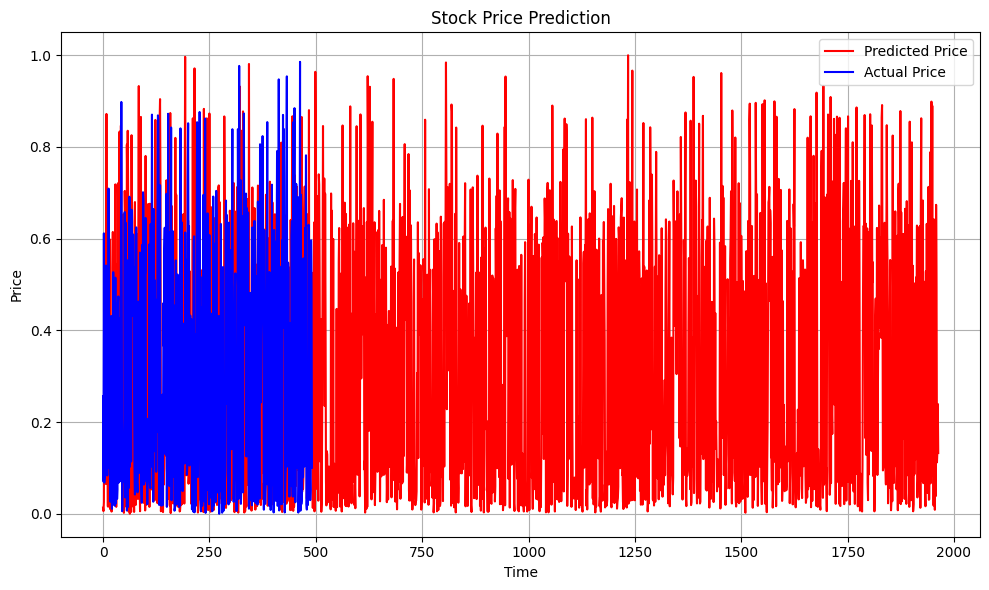

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(model.predict(), color='red', label="Predicted Price")
plt.plot(test_target, color='blue', label="Actual Price")
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
